In [1]:
# Import keras library. Also import some of the layers, so we do not need to
# write things like "layers.Dense", but can just write "Dense" instead
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import GaussianDropout
from tensorflow.python.keras import optimizers
import scipy

# Import the numpy library for matrix manipulations etc.

import random
#from numpy import *
import numpy as np
from numpy import array, zeros, exp, random, dot, shape, transpose, reshape, meshgrid, linspace, sqrt

# Set up the graphics by importing the matplotlib plotting library
import matplotlib.pyplot as mp # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

In [76]:
def gaussian(x,sig):
    return (np.exp(-np.power(x, 2.) / (2 * np.power(sig, 2.))),[1,0])

In [77]:
def lorentzian( x, gam ):
    return ( gam**2 / ( gam**2 + ( x )**2),[0,1])

In [78]:
#network parameters
global batchsize
batchsize=100
global batches
batches=100

In [112]:
#generating the training data
global x_values 
x_values = np.linspace(-15, 15, 250)
#max_std_deviation=5 for Gaussian
#max FWHM=5 for Lorentzian
def batchdata_generator():
    training_inputs=zeros([batchsize,250])
    training_results=zeros([batchsize,2])    
    for j in range(batchsize):
        b=random.randint(0,2)
        if(b==0):
            training_inputs[j,:],training_results[j,:] =  gaussian(x_values,random.uniform(0,5))
        if(b==1):
            training_inputs[j,:],training_results[j,:] =  lorentzian(x_values,random.uniform(0,5))

    return (training_inputs,training_results)


In [113]:
#initialising the network
#def init_network():
Net=Sequential() # creating a neural network!
Net.add(Dense(20,input_shape=(250,),activation="sigmoid")) # first hidden layer: 20 neurons (and 1 input neuron!)
Net.add(Dense(10,activation="sigmoid"))
Net.add(Dense(10,activation="sigmoid"))# second hidden layer: 10 neurons
Net.add(Dense(2,activation="softmax")) # output layer: 1 neuron
# Compile network: (randomly initialize weights, choose advanced optimizer, set up everything!)
Net.compile(loss='mean_squared_error',
              optimizer='adam') # adam is adaptive and works better than normal gradient descent



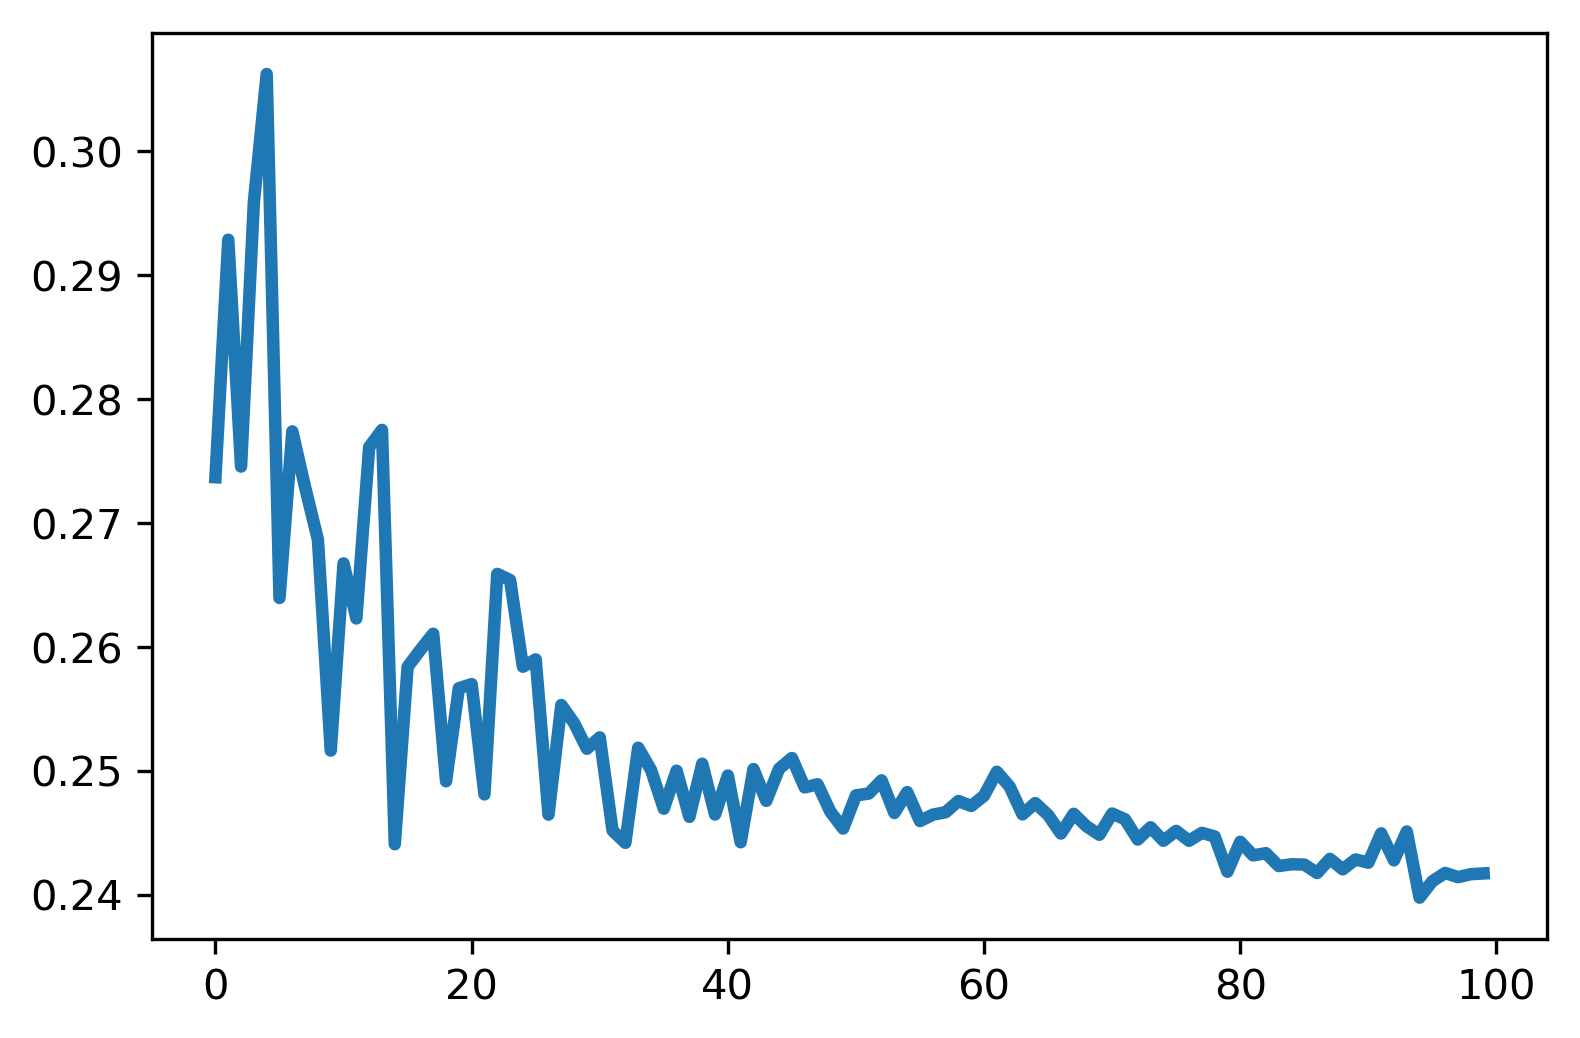

In [114]:
costs=zeros(batches)
Net.train_on_batch(training_inputs, training_results)
for j in range(batches):
    training_inputs,training_results=batchdata_generator()
    costs[j]=Net.train_on_batch(training_inputs, training_results)
plt.plot(costs,linewidth=3)
plt.show()

In [118]:
#make predictions
training_inputs,training_results=batchdata_generator()
predictions_probs=Net.predict_on_batch(training_inputs)
#predictions=np.argmax(predictions_probs,axis=1)
print(predictions)
print(training_results)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1.